# Trabajo Práctico: Sistemas de ecuaciones diferenciales y Estabilidad

## Objetivos

- Comprender el concepto de sistema de ecuaciones diferenciales y su importancia en la modelización de fenómenos dinámicos en ingeniería.
- Aplicar métodos analíticos y numéricos —como la Transformada de Laplace y el análisis de autovalores/autovectores— para estudiar la estabilidad de sistemas lineales.
- Desarrollar habilidades en el uso de herramientas simbólicas y numéricas de Python (SymPy, NumPy, SciPy y Matplotlib) para resolver y visualizar sistemas de ecuaciones diferenciales.
- Analizar el comportamiento dinámico de sistemas reales mediante la interpretación de campos vectoriales, planos de fase y condiciones de estabilidad.
- Integrar conocimientos matemáticos y computacionales en la resolución de un caso aplicado de control automático, reflexionando sobre las limitaciones y mejoras del modelo.
- Fomentar la autonomía, el pensamiento crítico y el uso responsable de la inteligencia artificial como apoyo al aprendizaje y a la resolución de problemas complejos.
- Comunicar de manera efectiva los resultados del trabajo, utilizando recursos visuales y audiovisuales para explicar procesos matemáticos y su aplicación en contextos de ingeniería.

## Etapa 3: Actividades de aplicación

### Resolución simbólica con SymPy

**1) Con el siguiente sistema:**

$$ x'(t) = 2x(t) + y(t) $$
$$ y'(t) = -x(t) + y(t) $$

**Desarrolle el código necesario para resolver las siguientes cuestiones:**

### a) Calcular los autovalores y autovectores de la matriz asociada.

La matriz asociada al sistema es:


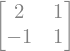


Los autovalores de la matriz son:


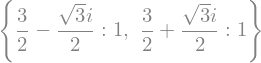


Los autovectores de la matriz son (formato: autovalor, multiplicidad, [autovectores]):


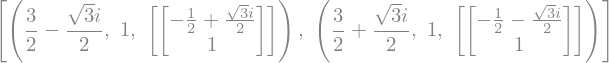

In [11]:
import sympy as sp

# Activamos la impresión bonita (pretty printing) para una mejor visualización
sp.init_printing(use_unicode=True)

# Definimos la matriz de coeficientes A del sistema x' = Ax
A = sp.Matrix([[2, 1], [-1, 1]])

print("La matriz asociada al sistema es:")
display(A)

# a) Cálculo de autovalores y autovectores
autovalores = A.eigenvals()
autovectores = A.eigenvects()

print("\nLos autovalores de la matriz son:")
display(autovalores)

print(
    "\nLos autovectores de la matriz son (formato: autovalor, multiplicidad, [autovectores]):"
)
display(autovectores)


### b) Clasificar el punto crítico (0,0).

In [12]:
# La clasificación se basa en la naturaleza de los autovalores.
# Extraemos el primer autovalor para analizarlo.
# Como son complejos conjugados, el análisis de uno es suficiente.
val = list(autovalores.keys())[0]

# Obtenemos su parte real e imaginaria
parte_real = sp.re(val)
parte_imaginaria = sp.im(val)

print(f"Análisis del autovalor: {val}")
print(f"Parte real: {parte_real}")
print(f"Parte imaginaria: {parte_imaginaria}")

# Realizamos la clasificación basada en la teoría de sistemas lineales
print("\n--- Clasificación del punto crítico (0,0) ---")
if parte_imaginaria != 0:
    if parte_real == 0:
        print("Resultado: El punto crítico es un CENTRO (estable).")
    elif parte_real > 0:
        print("Resultado: El punto crítico es un FOCO INESTABLE o ESPIRAL REPULSORA.")
        print(
            "Justificación: Los autovalores son complejos conjugados con parte real positiva."
        )
    else:  # parte_real < 0
        print("Resultado: El punto crítico es un FOCO ESTABLE o ESPIRAL ATRACTORA.")
else:
    # Este bloque es para autovalores reales, pero lo dejamos por completitud
    val2 = list(autovalores.keys())[1]
    if val * val2 < 0:
        print("Resultado: El punto crítico es un PUNTO DE SILLA (inestable).")
    else:
        if val > 0:
            print("Resultado: El punto crítico es un NODO INESTABLE o FUENTE.")
        else:
            print("Resultado: El punto crítico es un NODO ESTABLE o SUMIDERO.")


Análisis del autovalor: 3/2 - sqrt(3)*I/2
Parte real: 3/2
Parte imaginaria: -sqrt(3)/2

--- Clasificación del punto crítico (0,0) ---
Resultado: El punto crítico es un FOCO INESTABLE o ESPIRAL REPULSORA.
Justificación: Los autovalores son complejos conjugados con parte real positiva.


### c) Graficar el campo vectorial.

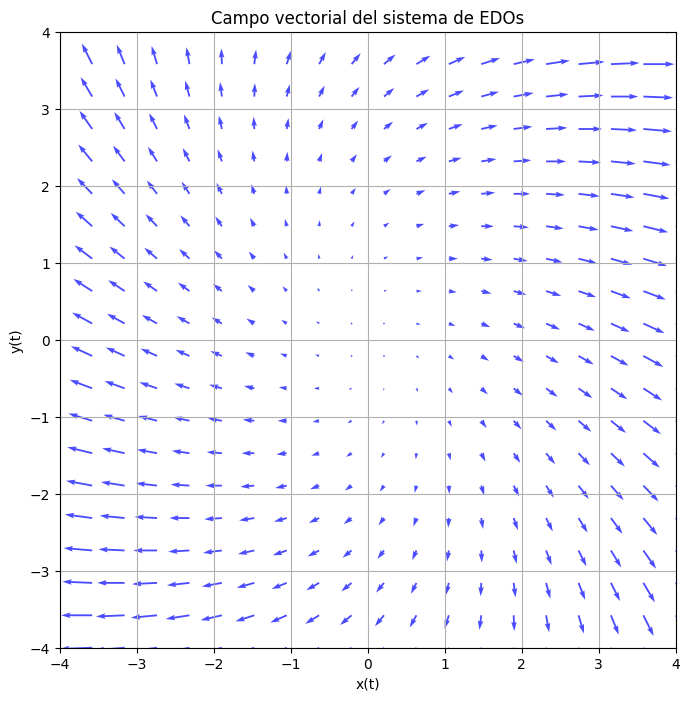

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos una malla de puntos (x,y) para evaluar el campo
x_lim, y_lim = 4, 4
x_puntos = np.linspace(-x_lim, x_lim, 20)
y_puntos = np.linspace(-y_lim, y_lim, 20)
X, Y = np.meshgrid(x_puntos, y_puntos)

# Definimos las ecuaciones del sistema para el campo vectorial
# u representa dx/dt y v representa dy/dt
u = 2 * X + Y
v = -X + Y

# Creamos la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Graficamos el campo vectorial usando quiver
ax.quiver(X, Y, u, v, color="blue", alpha=0.7)

# Configuramos los detalles del gráfico
ax.set_title("Campo vectorial del sistema de EDOs")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.grid(True)
ax.set_xlim([-x_lim, x_lim])
ax.set_ylim([-y_lim, y_lim])
# Hacemos que los ejes tengan la misma escala
ax.set_aspect("equal", adjustable="box")

plt.show()


### d) Representar algunas soluciones para diferentes condiciones iniciales.

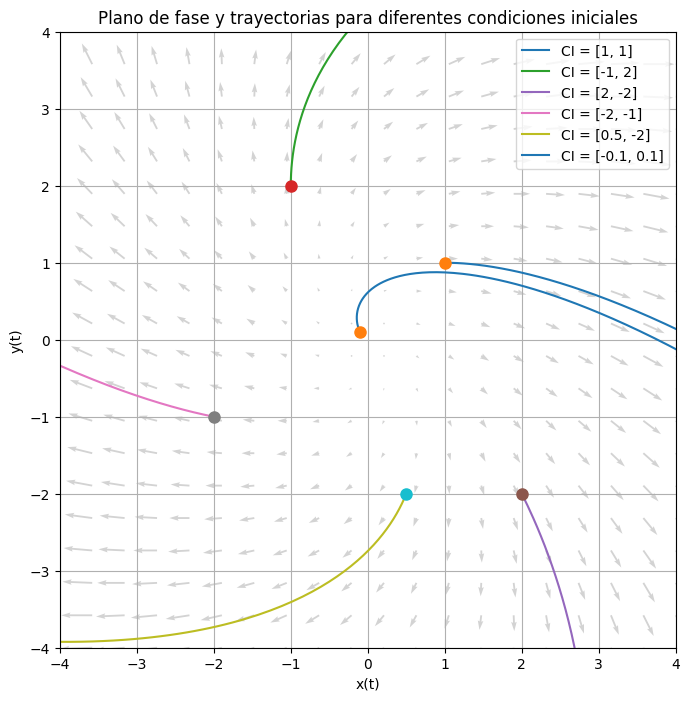

In [14]:
from scipy.integrate import odeint


# Definimos la función del sistema de EDOs para usarla con odeint de SciPy
# La función debe tener el formato f(estado, t), donde estado es un vector [x, y]
def sistema_edos(estado, t):
    x, y = estado
    dxdt = 2 * x + y
    dydt = -x + y
    return [dxdt, dydt]


# Definimos el intervalo de tiempo para la simulación
t = np.linspace(0, 2.5, 200)

# Lista de condiciones iniciales [x0, y0] para probar
condiciones_iniciales = [[1, 1], [-1, 2], [2, -2], [-2, -1], [0.5, -2], [-0.1, 0.1]]

# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Graficamos el campo vectorial de fondo para dar contexto
ax.quiver(X, Y, u, v, color="lightgray")

# Iteramos sobre cada condición inicial, resolvemos el sistema y graficamos la trayectoria
for ci in condiciones_iniciales:
    # odeint resuelve numéricamente el sistema
    solucion = odeint(sistema_edos, ci, t)
    # Graficamos la trayectoria resultante (solucion[:, 0] es x(t), solucion[:, 1] es y(t))
    ax.plot(solucion[:, 0], solucion[:, 1], label=f"CI = {ci}")
    # Marcamos el punto de inicio de cada trayectoria
    ax.plot(ci[0], ci[1], "o", markersize=8, label=f"_no_legend_")

# Configuramos los detalles del gráfico
ax.set_title("Plano de fase y trayectorias para diferentes condiciones iniciales")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.grid(True)
ax.legend()
ax.set_xlim([-x_lim, x_lim])
ax.set_ylim([-y_lim, y_lim])
ax.set_aspect("equal", adjustable="box")

plt.show()


**2) Dado el siguiente sistema de ecuaciones**

$$
\begin{pmatrix} x_1'(t) \\ x_2'(t) \end{pmatrix}
=
\begin{pmatrix} 0 & 1 \\ -1 & -k \end{pmatrix}
\begin{pmatrix} x_1(t) \\ x_2(t) \end{pmatrix}
$$

**Desarrolle el código necesario para analizar la estabilidad para los siguientes valores de k.**

Primero, realizamos un análisis simbólico para encontrar los autovalores en función de `k`.

Matriz A simbólica:


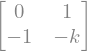


Autovalores en función de k:


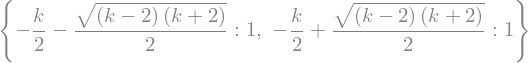

In [15]:
import sympy as sp

sp.init_printing(use_unicode=True)

# Definimos k como un símbolo
k = sp.Symbol("k")

# Definimos la matriz A con el símbolo k
A_simbolica = sp.Matrix([[0, 1], [-1, -k]])

print("Matriz A simbólica:")
display(A_simbolica)

# Calculamos los autovalores en función de k
autovalores_simbolicos = A_simbolica.eigenvals()

print("\nAutovalores en función de k:")
display(autovalores_simbolicos)


Ahora, para facilitar el análisis repetitivo, creamos una función que, dado un valor de `k`, calcule los autovalores, clasifique el punto crítico (0,0) y grafique el plano de fase correspondiente.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def analizar_estabilidad(k_valor, titulo_caso):
    """
    Analiza la estabilidad de un sistema lineal 2x2 para un valor k dado.
    Calcula autovalores, clasifica el punto crítico y grafica el plano de fase.
    """
    print(f"--- {titulo_caso} ---")
    print(f"Analizando para un valor representativo k = {k_valor}\n")

    # --- Análisis Numérico ---
    A_numerica = np.array([[0, 1], [-1, -k_valor]])
    autovalores, _ = np.linalg.eig(A_numerica)
    l1, l2 = autovalores[0], autovalores[1]

    print(f"Autovalores calculados: {l1:.4f} y {l2:.4f}")

    # --- Clasificación ---
    parte_real = np.real(l1)
    parte_imaginaria = np.imag(l1)

    print("\nClasificación del punto crítico (0,0):")
    if np.isclose(parte_imaginaria, 0):  # Autovalores reales
        if np.isclose(l1, l2):
            print("-> Nodo Impropio o Propio (autovalores reales repetidos)")
        elif l1 * l2 < 0:
            print("-> Punto de Silla (inestable)")
        elif l1 > 0:  # y l2 > 0
            print("-> Nodo Inestable o Fuente")
        else:  # l1 < 0 y l2 < 0
            print("-> Nodo Estable o Sumidero")
    else:  # Autovalores complejos
        if np.isclose(parte_real, 0):
            print("-> Centro (estable)")
        elif parte_real > 0:
            print("-> Foco Inestable o Espiral Repulsora")
        else:
            print("-> Foco Estable o Espiral Atractora")

    # --- Gráfico del Plano de Fase ---
    def sistema(X, t):
        x1, x2 = X
        return [x2, -x1 - k_valor * x2]

    x_lim = 3
    y_lim = 3
    x_puntos = np.linspace(-x_lim, x_lim, 20)
    y_puntos = np.linspace(-y_lim, y_lim, 20)
    X1, X2 = np.meshgrid(x_puntos, y_puntos)

    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            x_dot, y_dot = sistema([x, y], 0)
            u[i, j] = x_dot
            v[i, j] = y_dot

    fig, ax = plt.subplots(figsize=(8, 7))
    ax.quiver(X1, X2, u, v, color="gray")

    # Trayectorias
    t = np.linspace(0, 15, 200)
    cond_iniciales = [[1, 1], [-1, 2], [0, -2], [2, -1]]
    for ci in cond_iniciales:
        sol = odeint(sistema, ci, t)
        ax.plot(sol[:, 0], sol[:, 1])

    ax.set_xlim([-x_lim, x_lim])
    ax.set_ylim([-y_lim, y_lim])
    ax.set_xlabel("x1(t)")
    ax.set_ylabel("x2(t)")
    ax.set_title(f"Plano de Fase para {titulo_caso} (k={k_valor})")
    ax.grid(True)
    plt.show()



#### a) Caso `k > 2`

--- a) k > 2 ---
Analizando para un valor representativo k = 3

Autovalores calculados: -0.3820 y -2.6180

Clasificación del punto crítico (0,0):
-> Nodo Estable o Sumidero


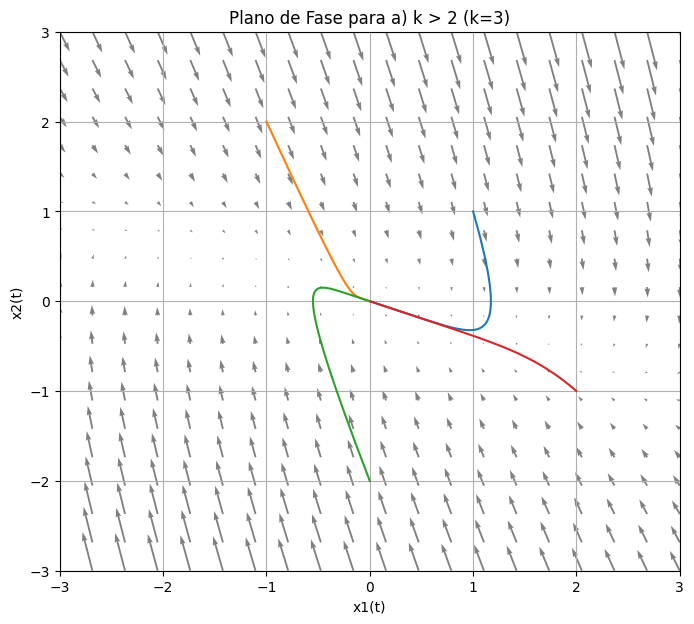

In [17]:
analizar_estabilidad(k_valor=3, titulo_caso="a) k > 2")


**Conclusión para `k > 2`:**
Los autovalores son reales, distintos y negativos. Por lo tanto, el punto crítico (0,0) es un **Nodo Estable** o **Sumidero**. Todas las trayectorias convergen al origen.

#### b) Caso `k = 2`

--- b) k = 2 ---
Analizando para un valor representativo k = 2

Autovalores calculados: -1.0000 y -1.0000

Clasificación del punto crítico (0,0):
-> Nodo Impropio o Propio (autovalores reales repetidos)


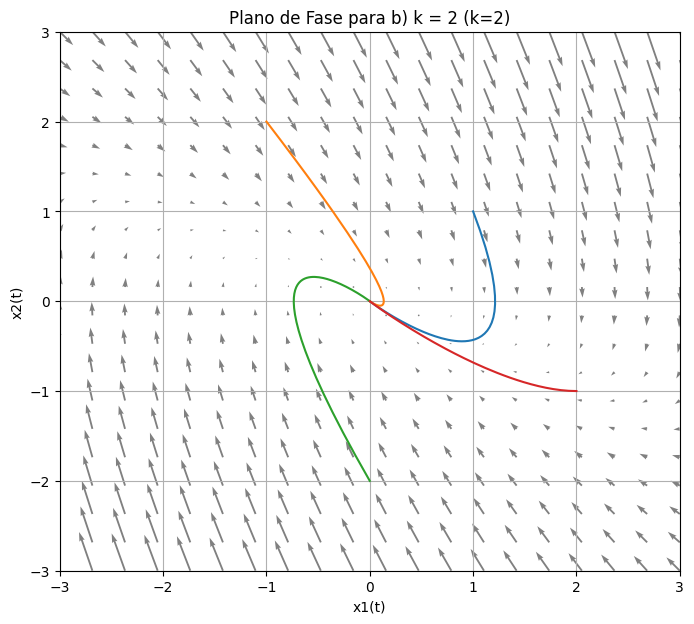

In [18]:
analizar_estabilidad(k_valor=2, titulo_caso="b) k = 2")


**Conclusión para `k = 2`:**
Los autovalores son reales, repetidos y negativos. El punto crítico (0,0) es un **Nodo Estable** (específicamente, un nodo impropio o propio estable). Las trayectorias convergen al origen.

#### c) Caso `0 < k < 2`

--- c) 0 < k < 2 ---
Analizando para un valor representativo k = 1

Autovalores calculados: -0.5000+0.8660j y -0.5000-0.8660j

Clasificación del punto crítico (0,0):
-> Foco Estable o Espiral Atractora


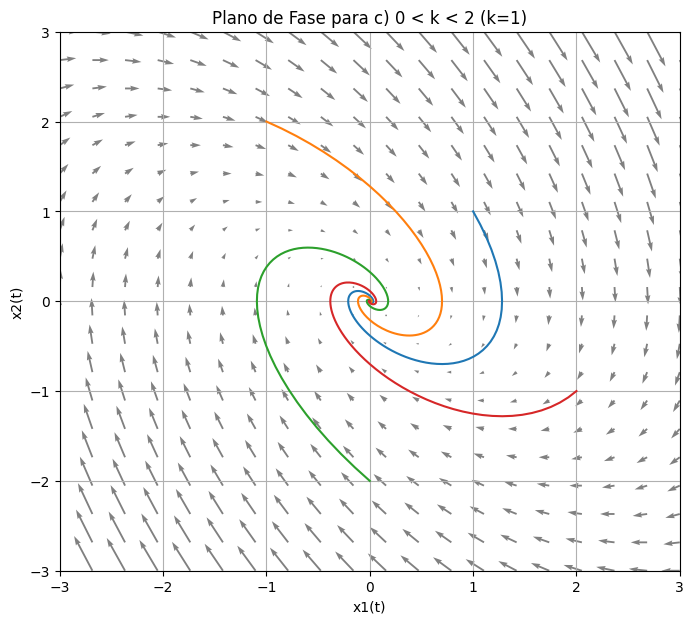

In [19]:
analizar_estabilidad(k_valor=1, titulo_caso="c) 0 < k < 2")


**Conclusión para `0 < k < 2`:**
Los autovalores son complejos conjugados con parte real negativa. El punto crítico (0,0) es un **Foco Estable** o **Espiral Atractora**. Las trayectorias se mueven en espiral hacia el origen.

#### d) Caso `k = 0`

--- d) k = 0 ---
Analizando para un valor representativo k = 0

Autovalores calculados: 0.0000+1.0000j y 0.0000-1.0000j

Clasificación del punto crítico (0,0):
-> Centro (estable)


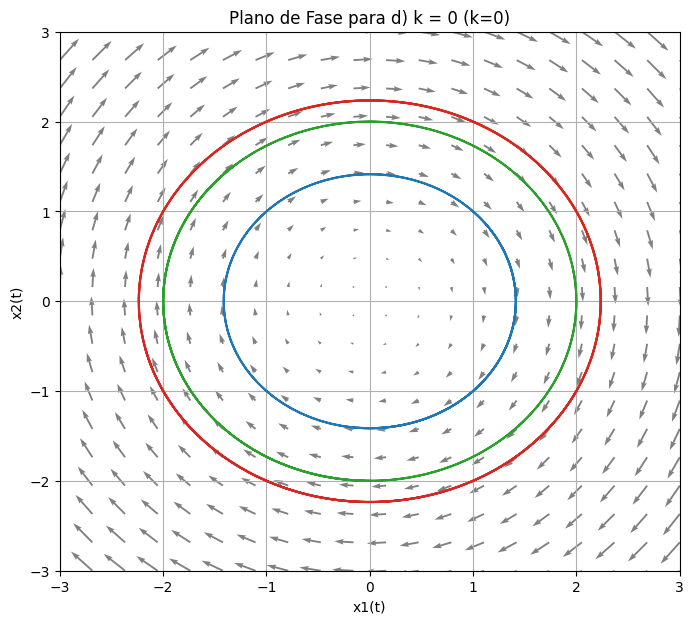

In [20]:
analizar_estabilidad(k_valor=0, titulo_caso="d) k = 0")


**Conclusión para `k = 0`:**
Los autovalores son imaginarios puros. El punto crítico (0,0) es un **Centro**. Es estable y las trayectorias son órbitas cerradas (elipses) alrededor del origen.

#### e) Caso `-2 < k < 0`

--- e) -2 < k < 0 ---
Analizando para un valor representativo k = -1

Autovalores calculados: 0.5000+0.8660j y 0.5000-0.8660j

Clasificación del punto crítico (0,0):
-> Foco Inestable o Espiral Repulsora


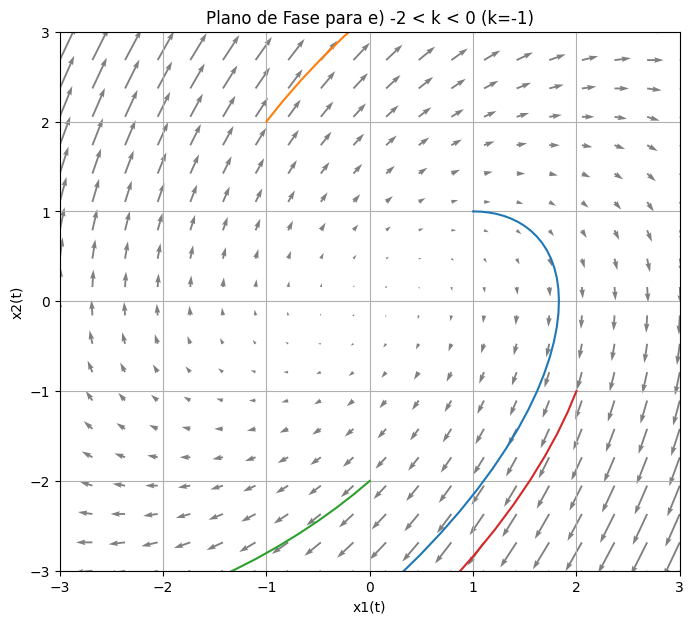

In [21]:
analizar_estabilidad(k_valor=-1, titulo_caso="e) -2 < k < 0")


**Conclusión para `-2 < k < 0`:**
Los autovalores son complejos conjugados con parte real positiva. El punto crítico (0,0) es un **Foco Inestable** o **Espiral Repulsora**. Las trayectorias se mueven en espiral alejándose del origen.

#### f) Caso `k = -2`

--- f) k = -2 ---
Analizando para un valor representativo k = -2

Autovalores calculados: 1.0000 y 1.0000

Clasificación del punto crítico (0,0):
-> Nodo Impropio o Propio (autovalores reales repetidos)


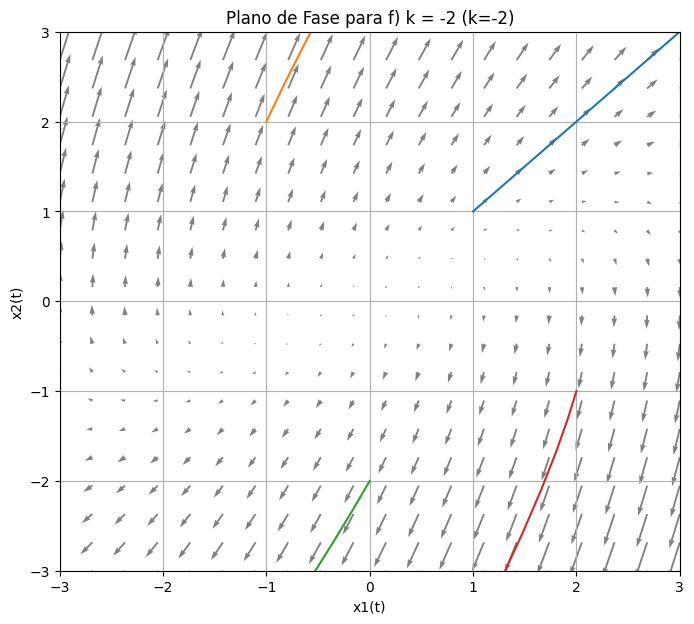

In [22]:
analizar_estabilidad(k_valor=-2, titulo_caso="f) k = -2")


**Conclusión para `k = -2`:**
Los autovalores son reales, repetidos y positivos. El punto crítico (0,0) es un **Nodo Inestable** (específicamente, un nodo impropio o propio inestable). Las trayectorias se alejan del origen.

#### g) Caso `k < -2`

--- g) k < -2 ---
Analizando para un valor representativo k = -3

Autovalores calculados: 0.3820 y 2.6180

Clasificación del punto crítico (0,0):
-> Nodo Inestable o Fuente


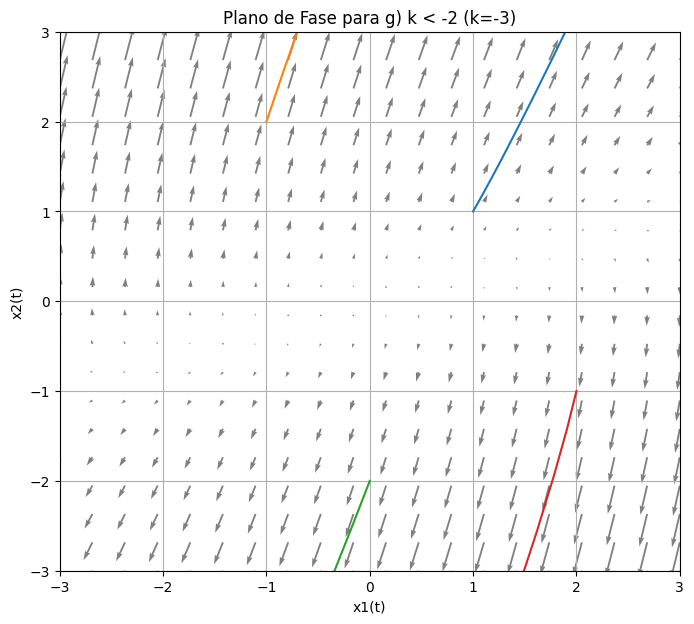

In [23]:
analizar_estabilidad(k_valor=-3, titulo_caso="g) k < -2")


**Conclusión para `k < -2`:**
Los autovalores son reales, distintos y positivos. El punto crítico (0,0) es un **Nodo Inestable** o **Fuente**. Todas las trayectorias se alejan del origen.

### 3) Problema de aplicación

### Problemas con el piloto automático

Consideremos un mecanismo que modela el piloto automático de un vehículo. Este mecanismo aplica un momento de torsión (movimiento rotacional) al eje de dirección, de modo que el vehículo seguirá un curso establecido con anterioridad (servomecanismo).

Si `y(t)` es la dirección real (el ángulo) del vehículo en el instante `t` y `g(t)` es la dirección deseada en el mismo instante, entonces el error entre la dirección deseada y la real viene dado por `e(t) = y(t) − g(t)`. Supongamos ahora que el mecanismo puede medir el error, `e(t)`, y retroalimentar al eje de dirección mediante un componente del momento de torsión proporcional a `e(t)`, pero opuesto en signo. Ahora bien, sabemos que la segunda ley de Newton, expresada en términos de momentos de torsión, establece que:

`(momento de inercia) x (aceleración angular) = (momento de torsión total)`

Por lo que, si denotamos `I ∈ ℝ` como el momento de inercia del eje de dirección y consideramos `k > 0` constante, entonces la ecuación que modela la dirección que sigue el vehículo a lo largo del tiempo viene dada por:

$$ I y''(t) = -k e(t) $$

Consideramos que el eje de dirección está inicialmente en reposo en la dirección cero y la dirección deseada está dada por `g(t) = at`, donde `a ∈ ℝ`.

### Comprensión del modelo

**1. Explicar qué representan las siguientes variables y constantes:**

*   **y(t):** Representa la **dirección angular real** o la orientación del vehículo en un instante de tiempo `t`. Es la variable de salida del sistema, lo que el vehículo realmente hace.
*   **g(t) = at:** Representa la **dirección angular deseada** o la trayectoria de referencia que se quiere que el vehículo siga. Al ser una función lineal del tiempo, indica que el objetivo es que el vehículo gire a una velocidad angular constante `a`.
*   **e(t) = g(t) - y(t):** Representa el **error de seguimiento**. Es la diferencia instantánea entre la dirección deseada (`g(t)`) y la dirección real del vehículo (`y(t)`). El objetivo del sistema de control es minimizar este error, idealmente llevándolo a cero. *Nota: Esta definición de error es la que se presenta en la pregunta; el signo puede variar según la convención del problema.*
*   **I:** Es el **momento de inercia** del eje de dirección. Es una constante física que mide la resistencia del eje a ser rotado. Un valor de `I` más alto significa que se necesita más torque para producir la misma aceleración angular.
*   **k:** Es la **constante de ganancia proporcional** o "rigidez" del controlador. Es un parámetro de diseño que determina la intensidad del momento de torsión de corrección que se aplica en respuesta a un error detectado. Un `k` más alto implica una corrección más fuerte y rápida.

**2. ¿Por qué se dice que el sistema funciona como un servomecanismo?**

Se dice que el sistema funciona como un **servomecanismo** porque cumple con las características fundamentales de este tipo de sistema de control de lazo cerrado:

1.  **Medición de la Salida:** El sistema mide continuamente su estado actual, que es la dirección real del vehículo `y(t)`.
2.  **Referencia o Comando:** Existe una señal de entrada deseada, `g(t)`, que el sistema debe seguir.
3.  **Detección de Error:** El sistema calcula la diferencia (el error `e(t)`) entre la referencia y la salida medida.
4.  **Retroalimentación (Feedback):** Utiliza este error para generar una acción de control. En este caso, el error se "retroalimenta" para calcular un momento de torsión.
5.  **Acción Correctiva:** La acción de control (el momento de torsión `-ke`) se aplica al sistema físico (el eje de dirección) con el objetivo de reducir el error y forzar a que la salida `y(t)` se aproxime lo más posible a la entrada de referencia `g(t)`.

En resumen, es un sistema automático que utiliza la retroalimentación del error para controlar la posición angular de un mecanismo y hacer que siga una trayectoria deseada, que es la definición exacta de un servomecanismo.

### Planteo matemático

**3. Escribir la ecuación diferencial que modela el sistema con sus condiciones iniciales.**

Partimos de la ecuación dada por la segunda ley de Newton: `I y''(t) = -k e(t)`.
El enunciado define el error como `e(t) = y(t) - g(t)`. Para modelar el comportamiento del error, necesitamos escribir la ecuación en términos de `e(t)`.

Despejamos `y(t)`: `y(t) = e(t) + g(t)`.
Derivamos dos veces con respecto al tiempo:
$$ y'(t) = e'(t) + g'(t) $$
$$ y''(t) = e''(t) + g''(t) $$

La trayectoria deseada es `g(t) = at`. Por lo tanto, sus derivadas son: `g'(t) = a` y `g''(t) = 0`.

Sustituyendo `y''(t) = e''(t)` en la ecuación de Newton, obtenemos la EDO para el error:
$$ I e''(t) = -k e(t) $$
Reordenando, nos queda una EDO de segundo orden, lineal y homogénea:
$$ I e''(t) + k e(t) = 0 $$

Ahora, determinamos las **condiciones iniciales** para `e(t)`:
1.  `e(0) = y(0) - g(0)`. Dado que `y(0) = 0` y `g(0) = a*0 = 0`, entonces **`e(0) = 0`**.
2.  `e'(t) = y'(t) - g'(t)`. Dado que `y'(0) = 0` (parte del reposo) y `g'(t) = a`, entonces `e'(0) = 0 - a`. Por lo tanto, **`e'(0) = -a`**.

El modelo matemático completo para el error es:
$$ I e''(t) + k e(t) = 0, \quad \text{con } e(0) = 0, \quad e'(0) = -a $$

**4. ¿Qué tipo de sistema es? ¿Lineal/homogéneo?**

El sistema descrito por la ecuación `I e''(t) + k e(t) = 0` es:
*   **Lineal:** Porque la variable `e(t)` y sus derivadas aparecen con potencia 1 y no hay productos entre ellas.
*   **Homogéneo:** Porque la ecuación está igualada a cero. No hay términos que dependan únicamente de la variable independiente `t` (términos forzados).
*   Es una EDO de **segundo orden** con **coeficientes constantes** (`I` y `k`).

### Resolución analítica con transformada de Laplace

**5. Aplicar la transformada de Laplace a la ecuación diferencial.**

La EDO a transformar es:


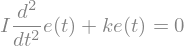


La ecuación en el dominio de Laplace es:


In [24]:
import sympy as sp

sp.init_printing(use_unicode=True)

# Definimos los símbolos y variables
t, s = sp.symbols("t, s")
I, k, a = sp.symbols("I, k, a", real=True, positive=True)
e = sp.Function("e")(t)

# Escribimos la EDO
edo = I * e.diff(t, 2) + k * e
print("La EDO a transformar es:")
display(sp.Eq(edo, 0))

# Condiciones iniciales
e0 = 0
e_dot0 = -a

# Aplicamos la regla de la transformada para la segunda derivada:
# L{f''(t)} = s^2*F(s) - s*f(0) - f'(0)
E_s = sp.Symbol("E(s)")  # Símbolo para la transformada L{e(t)}

# Transformamos término a término
L_e_tt = s**2 * E_s - s * e0 - e_dot0
L_e_t = E_s

# Construimos la ecuación en el dominio de Laplace
eq_laplace = I * L_e_tt + k * L_e_t
print("\nLa ecuación en el dominio de Laplace es:")
display(sp.Eq(eq_laplace, 0))



**6. Resolver para E(s).**

La expresión para E(s) es:


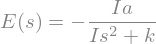

In [25]:
# Resolvemos la ecuación para E(s)
sol_Es = sp.solve(eq_laplace, E_s)
E_s_expr = sol_Es[0]

print("La expresión para E(s) es:")
display(sp.Eq(E_s, E_s_expr))


**7. Calcular la transformada inversa y obtener e(t).**

La solución para el error e(t) es:


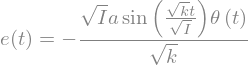

In [26]:
# Calculamos la transformada inversa de Laplace para encontrar e(t)
e_t_sol = sp.inverse_laplace_transform(E_s_expr, s, t)

print("La solución para el error e(t) es:")
display(sp.Eq(sp.Symbol('e(t)'), e_t_sol))



### Análisis de estabilidad

**8. Analizar cómo depende el comportamiento del error de los valores de k y I (casos: k > 0, k = 0, k < 0).**

El comportamiento del sistema depende de las raíces de la ecuación característica `Iλ² + k = 0`, es decir, `λ = ±√(-k/I)`.

*   **Caso 1: k > 0** (y `I > 0`, como se define en el problema)
    *   Las raíces son puramente imaginarias: `λ = ±j√(k/I)`.
    *   La solución `e(t)` es una oscilación sinusoidal pura, como encontramos con Laplace: `e(t) = -a√(I/k) * sin(√(k/I) * t)`.
    *   **Comportamiento:** El error oscila perpetuamente alrededor de cero con una amplitud constante. No crece, pero tampoco decae. El sistema es **marginalmente estable**.

*   **Caso 2: k = 0**
    *   La ecuación se simplifica a `I e''(t) = 0`, lo que implica `e''(t) = 0`.
    *   Integrando dos veces obtenemos `e(t) = C₁t + C₂`.
    *   Con `e(0)=0`, `C₂=0`. Con `e'(0)=-a`, `C₁=-a`.
    *   **Comportamiento:** La solución es `e(t) = -at`. El error crece linealmente en magnitud de forma indefinida. El sistema es **inestable**.

*   **Caso 3: k < 0**
    *   Sea `k = -p` donde `p > 0`. La ecuación característica es `Iλ² - p = 0`.
    *   Las raíces son reales y de signos opuestos: `λ = ±√(p/I)`.
    *   La solución es de la forma `e(t) = C₁e^(√(p/I)t) + C₂e^(-√(p/I)t)`.
    *   **Comportamiento:** La presencia de la exponencial con exponente positivo (`e^(√(p/I)t)`) hace que el error crezca sin límite. El sistema es **inestable**.

**9. ¿El sistema es estable, asintóticamente estable o inestable? Justificar con autovalores.**

Los autovalores del sistema son las raíces de la ecuación característica.

*   Para el caso de diseño (`k > 0`), los autovalores son `λ₁,₂ = ±j√(k/I)`.
    *   La parte real de ambos autovalores es cero.
    *   Un sistema es **asintóticamente estable** si la parte real de *todos* sus autovalores es estrictamente negativa. Esto no se cumple.
    *   Un sistema es **inestable** si la parte real de *al menos un* autovalor es positiva. Esto no se cumple.
    *   Un sistema es **estable (o marginalmente estable)** si la parte real de todos sus autovalores es menor o igual a cero, y los que tienen parte real cero son simples (no repetidos). Esto sí se cumple.

*   **Justificación:** El sistema, para `k > 0`, es **estable (marginalmente estable)**, pero no asintóticamente estable. Sus autovalores se encuentran sobre el eje imaginario, lo que resulta en una respuesta oscilatoria que no se atenúa. Para `k ≤ 0`, el sistema es **inestable**.

**10. Relacionar la clasificación con nodo, foco, centro o punto de silla.**

Para esta clasificación, convertimos la EDO de 2º orden en un sistema de dos EDOs de 1º orden. Sea `x₁ = e(t)` y `x₂ = e'(t)`.

El sistema es:
$$ x₁' = x₂ $$
$$ x₂' = e''(t) = -\frac{k}{I}e(t) = -\frac{k}{I}x₁ $$

En forma matricial, `x' = Ax`:
$$
\begin{pmatrix} x₁' \\ x₂' \end{pmatrix}
=
\begin{pmatrix} 0 & 1 \\ -k/I & 0 \end{pmatrix}
\begin{pmatrix} x₁ \\ x₂ \end{pmatrix}
$$

La clasificación del punto de equilibrio (0,0) depende de los autovalores de la matriz `A`, que son los mismos que ya calculamos.

*   **Caso k > 0:** Los autovalores son imaginarios puros (`±jω`). Esta es la definición de un **CENTRO**. En el plano de fase, las trayectorias son órbitas cerradas.

*   **Caso k < 0:** Los autovalores son reales y de signos opuestos (`±α`). Esta es la definición de un **PUNTO DE SILLA**. El origen es un punto de equilibrio inestable.

*   **Caso k = 0:** Los autovalores son `λ=0` (raíz repetida). Este es un caso degenerado, pero el análisis del comportamiento (`e(t)=-at`) muestra una deriva inestable.

### Resolución numérica y gráfica en Python

**11. Resolver el problema con SymPy y SciPy.solve_ivp.**

Usaremos la solución analítica que ya encontramos con SymPy y la compararemos con la solución numérica de `scipy.integrate.solve_ivp`.

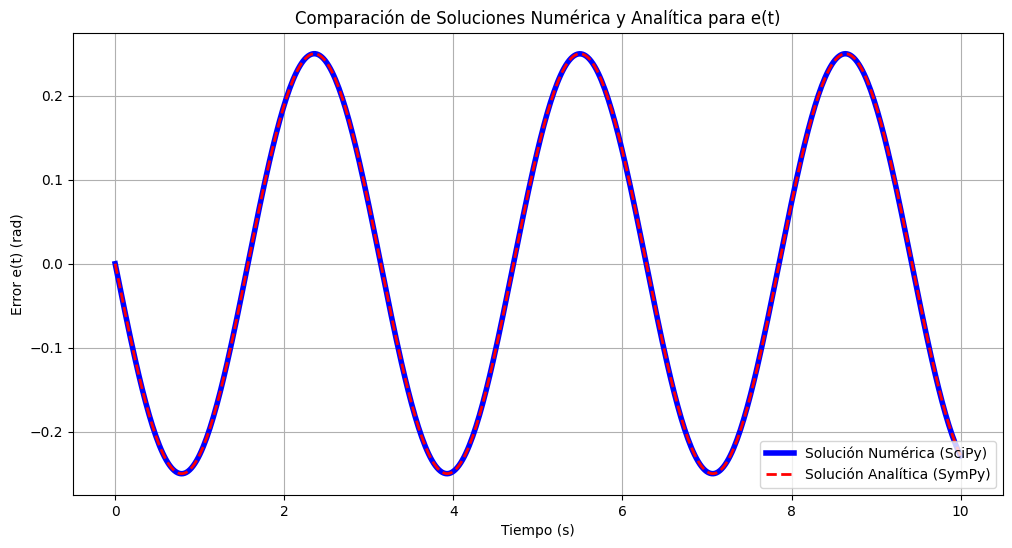

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

# --- Parámetros para la simulación ---
I_val = 2.0  # Momento de inercia (kg*m^2)
k_val = 8.0  # Ganancia del controlador (N*m/rad)
a_val = 0.5  # Velocidad angular deseada (rad/s)

# --- Solución Numérica con SciPy ---
# Definimos el sistema de EDOs de primer orden: x₁' = x₂, x₂' = -(k/I)x₁
def sistema_piloto(t, X, I, k):
    x1, x2 = X
    return [x2, -(k / I) * x1]

# Condiciones iniciales: [e(0), e'(0)]
condiciones_iniciales = [0, -a_val]

# Intervalo de tiempo para la simulación
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolvemos la EDO
sol_numerica = solve_ivp(
    sistema_piloto,
    t_span,
    condiciones_iniciales,
    args=(I_val, k_val),
    dense_output=True,
    t_eval=t_eval,
)

# --- Solución Analítica con SymPy ---
# Reutilizamos la solución simbólica e_t_sol
t_sym, I_sym, k_sym, a_sym = sp.symbols("t I k a", real=True, positive=True)
e_t_analitica_expr = (
    -a_sym * sp.sqrt(I_sym / k_sym) * sp.sin(t_sym * sp.sqrt(k_sym / I_sym))
)

# Convertimos la expresión simbólica a una función numérica para graficar
e_t_func = sp.lambdify((t_sym, I_sym, k_sym, a_sym), e_t_analitica_expr, "numpy")
e_analitico = e_t_func(t_eval, I_val, k_val, a_val)

# --- Graficamos para comparar ---
plt.figure(figsize=(12, 6))
plt.plot(
    sol_numerica.t,
    sol_numerica.y[0],
    "b-",
    label="Solución Numérica (SciPy)",
    linewidth=4,
)
plt.plot(t_eval, e_analitico, "r--", label="Solución Analítica (SymPy)", linewidth=2)
plt.title("Comparación de Soluciones Numérica y Analítica para e(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error e(t) (rad)")
plt.grid(True)
plt.legend()
plt.show()


**12. Graficar e(t) para distintos valores de k y I.**

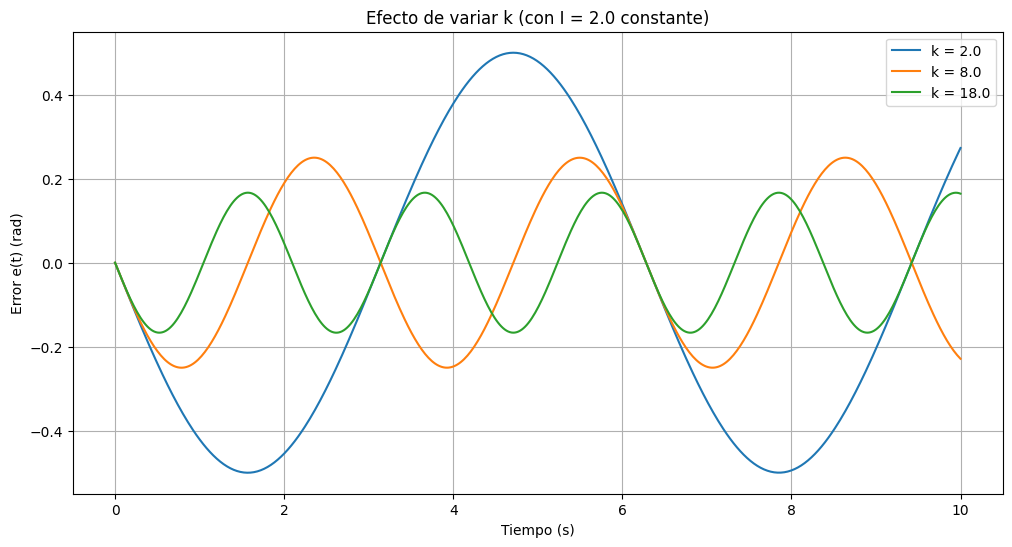

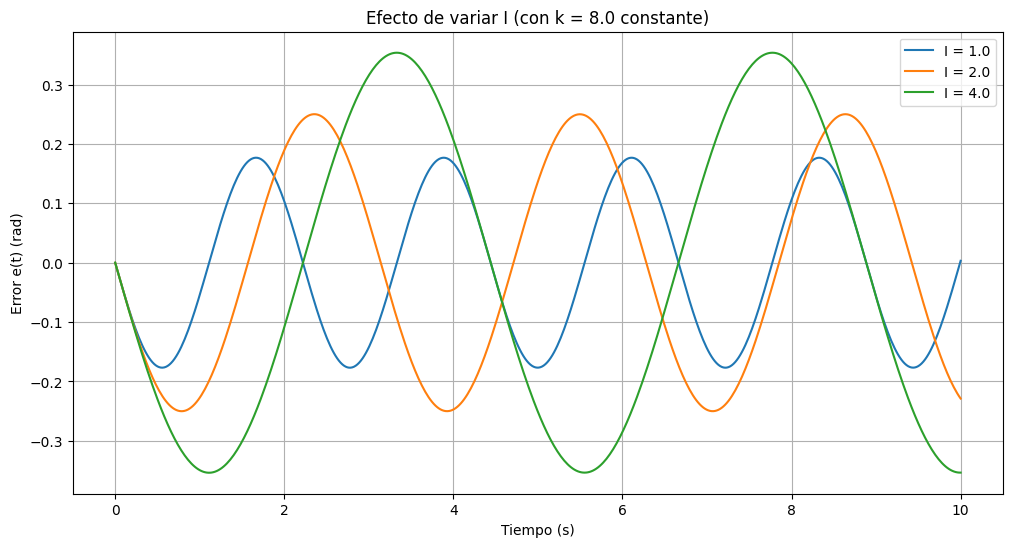

In [28]:
# Mantenemos I constante y variamos k
k_valores = [2.0, 8.0, 18.0]
plt.figure(figsize=(12, 6))
for k_i in k_valores:
    sol = solve_ivp(
        sistema_piloto, t_span, condiciones_iniciales, args=(I_val, k_i), t_eval=t_eval
    )
    plt.plot(sol.t, sol.y[0], label=f"k = {k_i}")

plt.title(f"Efecto de variar k (con I = {I_val} constante)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error e(t) (rad)")
plt.grid(True)
plt.legend()
plt.show()

# Mantenemos k constante y variamos I
I_valores = [1.0, 2.0, 4.0]
plt.figure(figsize=(12, 6))
for I_i in I_valores:
    sol = solve_ivp(
        sistema_piloto, t_span, condiciones_iniciales, args=(I_i, k_val), t_eval=t_eval
    )
    plt.plot(sol.t, sol.y[0], label=f"I = {I_i}")

plt.title(f"Efecto de variar I (con k = {k_val} constante)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error e(t) (rad)")
plt.grid(True)
plt.legend()
plt.show()


**13. Representar el plano de fases (e(t) vs e'(t)).**

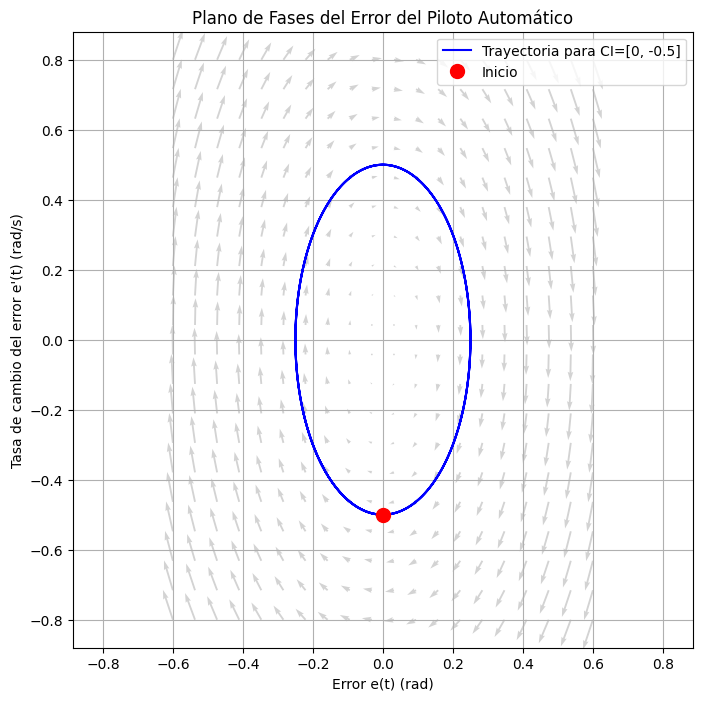

In [29]:
# Usamos la solución ya calculada con I=2.0 y k=8.0
e_vals = sol_numerica.y[0]
e_dot_vals = sol_numerica.y[1]

# Definimos la malla para el campo vectorial
e_grid, e_dot_grid = np.meshgrid(np.linspace(-0.6, 0.6, 20), np.linspace(-0.8, 0.8, 20))
u, v = np.zeros(e_grid.shape), np.zeros(e_dot_grid.shape)
NI, NJ = e_grid.shape
for i in range(NI):
    for j in range(NJ):
        x_dot, y_dot = sistema_piloto(0, [e_grid[i, j], e_dot_grid[i, j]], I_val, k_val)
        u[i, j] = x_dot
        v[i, j] = y_dot

plt.figure(figsize=(8, 8))
# Dibujamos el campo vectorial
plt.quiver(e_grid, e_dot_grid, u, v, color="lightgray")
# Dibujamos la trayectoria
plt.plot(e_vals, e_dot_vals, "b-", label=f"Trayectoria para CI={condiciones_iniciales}")
# Marcamos el punto de inicio
plt.plot(
    condiciones_iniciales[0],
    condiciones_iniciales[1],
    "ro",
    markersize=10,
    label="Inicio",
)
plt.title("Plano de Fases del Error del Piloto Automático")
plt.xlabel("Error e(t) (rad)")
plt.ylabel("Tasa de cambio del error e'(t) (rad/s)")
plt.grid(True)
plt.axis("equal")
plt.legend()
plt.show()


### Reflexión

**14. ¿Por qué aparecen oscilaciones en el error?**

Las oscilaciones aparecen por la naturaleza fundamental del sistema de control implementado.

*   **Análogía Física:** El sistema `I e''(t) + k e(t) = 0` es matemáticamente idéntico a un **sistema masa-resorte sin amortiguamiento**. La inercia `I` actúa como la masa y la ganancia `k` como la constante del resorte. Cuando se perturba el sistema (por la condición inicial `e'(0) = -a`), el "resorte" del controlador aplica una fuerza restauradora. Debido a la inercia, el sistema sobrepasa el punto de equilibrio (error cero) y la fuerza restauradora actúa en la dirección opuesta, generando un ciclo perpetuo de oscilación.

*   **Análisis Matemático:** La razón matemática es que los autovalores del sistema son **puramente imaginarios** (`λ = ±j√(k/I)`). Un sistema cuyos autovalores son imaginarios puros siempre tendrá una solución en forma de senos y cosenos, que describen una oscilación no amortiguada. No hay un término de parte real negativa en los autovalores que haga que estas oscilaciones decaigan.

**15. ¿Qué sucede cuando se aumenta k? ¿Qué limitaciones presenta el modelo? ¿Cómo podría mejorarse para lograr mayor estabilidad?**

*   **¿Qué sucede cuando se aumenta k?**
    Al aumentar `k` (la "rigidez" del controlador), se observan dos efectos:
    1.  **La frecuencia de la oscilación aumenta:** El término de la frecuencia es `ω = √(k/I)`, por lo que a mayor `k`, mayor `ω`. El sistema reacciona más rápido.
    2.  **La amplitud de la oscilación disminuye:** El término de la amplitud es `A = a√(I/k)`, por lo que a mayor `k`, menor `A`. Un controlador más "fuerte" reduce la magnitud máxima del error.

*   **¿Qué limitaciones presenta el modelo?**
    La principal limitación es que es un **modelo idealizado sin amortiguamiento**. En el mundo real, siempre existe fricción o resistencia. En este modelo, al no haber un término de amortiguamiento, la energía del sistema nunca se disipa, lo que resulta en oscilaciones perpetuas (sistema **marginalmente estable**). En la práctica, el vehículo nunca se estabilizaría por completo.

*   **¿Cómo podría mejorarse para lograr mayor estabilidad?**
    Para lograr una **estabilidad asintótica** (que el error tienda a cero), es necesario introducir un **término de amortiguamiento**. En control, esto se logra con un **controlador Proporcional-Derivativo (PD)**, añadiendo un término proporcional a la *derivada* del error:
    $$ \text{Momento de Torsión} = -k_p e(t) - k_d e'(t) $$
    La nueva EDO para el error sería:
    $$ I e''(t) + k_d e'(t) + k_p e(t) = 0 $$
    Esta es la ecuación de un **oscilador armónico amortiguado**. Con `k_d > 0` (el coeficiente de amortiguamiento), los autovalores tendrían una parte real negativa, garantizando que `e(t)` converja a cero.

### Seguimos analizando

Consideremos que se añade sobre el eje de dirección un componente adicional del momento de torsión proporcional a `e'(t)` y opuesto en signo, para así poder controlar las oscilaciones. Así, si consideramos `μ > 0`, la ecuación que modela ahora la dirección que sigue el vehículo a lo largo del tiempo viene dada por:

$$ Iy'' = -ke - μe' $$

Vamos a calcular de nuevo el error `e(t)` para el piloto automático en el caso particular en el que el eje de dirección está inicialmente en reposo en la dirección cero y la dirección deseada está dada por `g(t) = at`, donde `a ∈ ℝ`. Consideraremos además **amortiguamiento ligero** (`μ < 2√(Ik)`). Para dicho cálculo, tenemos entonces que resolver el siguiente problema de valores iniciales:

$$
\begin{cases}
Iy''(t) = -k(y(t) - at) - μ(y'(t) - a) \\
y(0) = 0 \\
y'(0) = 0
\end{cases}
$$

**16. Encuentre Y(t).**

Para encontrar `y(t)`, resolvemos la ecuación diferencial para el error `e(t) = y(t) - at`, ya que resulta en una EDO homogénea. Como se derivó antes, `y''(t) = e''(t)`. Sustituyendo en la nueva ecuación:

$$ I e''(t) = -k e(t) - μ (e'(t) + a - a) \implies I e''(t) + μ e'(t) + k e(t) = 0 $$

Las condiciones iniciales para el error siguen siendo `e(0) = 0` y `e'(0) = -a`. Resolvemos este PVI usando SymPy.

La solución para Y(t) es:


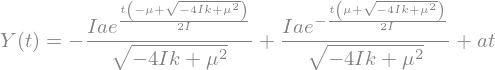

In [30]:
import sympy as sp

sp.init_printing(use_unicode=True)

# Definimos los símbolos y la función del error
t = sp.Symbol("t", real=True, positive=True)
I, k, mu, a = sp.symbols("I k mu a", real=True, positive=True)
e = sp.Function("e")

# Definimos la EDO homogénea para el error
edo_amortiguada = sp.Eq(I * e(t).diff(t, 2) + mu * e(t).diff(t) + k * e(t), 0)

# Resolvemos la EDO para e(t) con las condiciones iniciales
sol_e_particular = sp.dsolve(edo_amortiguada, e(t), ics={e(0): 0, e(t).diff(t).subs(t, 0): -a})
e_t_particular = sol_e_particular.rhs

# Encontramos Y(t) usando la relación y(t) = e(t) + at
y_t_solucion = e_t_particular + a * t

print("La solución para Y(t) es:")
display(sp.Eq(sp.Symbol("Y(t)"), y_t_solucion))



**17. Recuerde que E(t) = Y(t) - a/t^2 encuentre la funcion del error e(t) y analice sus parámetros para estabilizar el error.**

*(Nota: Existe una posible errata en la definición del error `E(t)` en el enunciado. Se procederá utilizando la definición consistente a lo largo de todo el problema: `e(t) = y(t) - g(t) = y(t) - at`)*.

La función del error `e(t)` fue calculada en el paso anterior.

La función del error e(t) es:


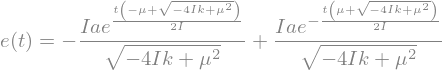

In [31]:
print("La función del error e(t) es:")
display(sp.Eq(sp.Symbol("e(t)"), e_t_particular))


#### Análisis de los parámetros para estabilizar el error

La solución para `e(t)` tiene la forma de una sinusoide multiplicada por una exponencial decreciente: `e(t) = A * exp(-αt) * sin(ω_d*t + φ)`.

1.  **Término Exponencial (`exp(-μt / 2I)`):** Este es el término clave para la estabilización.
    *   Para que el error se estabilice (`e(t) → 0` cuando `t → ∞`), el exponente `-μ / (2I)` debe ser negativo.
    *   Como `I > 0`, la condición se reduce a **`μ > 0`**.
    *   El parámetro `μ` (mu) es el **coeficiente de amortiguamiento**. Su presencia (`μ > 0`) garantiza que el sistema sea **asintóticamente estable**. Un `μ` más grande hace que las oscilaciones decaigan más rápidamente.

2.  **Término Sinusoidal (`sin(...)`):** Este término describe las oscilaciones.
    *   La condición de **amortiguamiento ligero** (`μ < 2√(Ik)`) asegura que el término dentro de la raíz cuadrada en la solución (`4Ik - μ²`) sea positivo, lo que significa que el sistema todavía oscila mientras converge a cero (caso subamortiguado).

**En conclusión:** La introducción del parámetro de amortiguamiento `μ > 0` es la mejora fundamental que cambia el sistema de ser meramente estable a ser **asintóticamente estable**, garantizando que el error del piloto automático eventualmente se anule.

### Conclusiones

**18. Elabore conclusiones de los dos análisis.**

A lo largo de este trabajo, se ha realizado un análisis de sistemas de EDOs para modelar y entender fenómenos dinámicos, culminando en el estudio de un piloto automático. De los dos análisis realizados sobre este problema (sin y con amortiguamiento), se extraen las siguientes conclusiones:

1.  **La Importancia de los Autovalores:** La estabilidad de un sistema lineal depende directamente de los autovalores de su matriz característica. El primer análisis (sin amortiguamiento) resultó en autovalores puramente imaginarios, lo que se tradujo en un comportamiento oscilatorio perpetuo (un **Centro**), clasificando al sistema como **marginalmente estable**. Si bien el error no crecía, tampoco se corregía, lo cual es inaceptable para un sistema de control.

2.  **Limitaciones de los Modelos Idealizados:** El modelo inicial (`Ie'' + ke = 0`) es una idealización sin disipación de energía. Su predicción de oscilaciones infinitas revela su principal limitación.

3.  **El Rol Crucial del Amortiguamiento:** El segundo análisis introdujo un término de amortiguamiento (`μe'`). Este cambio fue transformador. La nueva ecuación (`Ie'' + μe' + ke = 0`) es la de un oscilador amortiguado. La presencia de `μ > 0` desplaza los autovalores hacia el semiplano izquierdo del plano complejo, dotándolos de una parte real negativa.

4.  **De Estabilidad Marginal a Asintótica:** El amortiguamiento convierte un sistema meramente estable en uno **asintóticamente estable**. La solución para `e(t)` adquiere un factor exponencial decreciente (`exp(-αt)`) que fuerza a las oscilaciones a decaer, garantizando que el error converja a cero. Esto representa el comportamiento deseado de un servomecanismo: no solo reacciona al error, sino que lo elimina eficazmente.

5.  **Validación Computacional:** El uso de Python (SymPy, SciPy, Matplotlib) fue fundamental. SymPy permitió obtener soluciones analíticas precisas. SciPy y Matplotlib permitieron simular y visualizar el comportamiento de los sistemas, haciendo tangibles conceptos abstractos como un "Centro" versus un "Foco Estable", y demostrando cómo la variación de parámetros como `k` y `μ` afecta la respuesta.

En síntesis, el trabajo demuestra que un diseño de control efectivo requiere no solo una fuerza correctiva (control proporcional, `k`), sino también un mecanismo para disipar energía y evitar oscilaciones (control derivativo, `μ`). El análisis matemático proporciona el marco teórico para predecir la estabilidad, mientras que el software permite validar y visualizar estos análisis.